In [13]:
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import cv2

In [14]:
img_file = "test_img3.jpg"
img = cv2.imread(img_file)

In [15]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    # print(im_data.shape)
    # height, width, depth = im_data.shape
    height = im_data.shape[0]
    width = im_data.shape[1]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


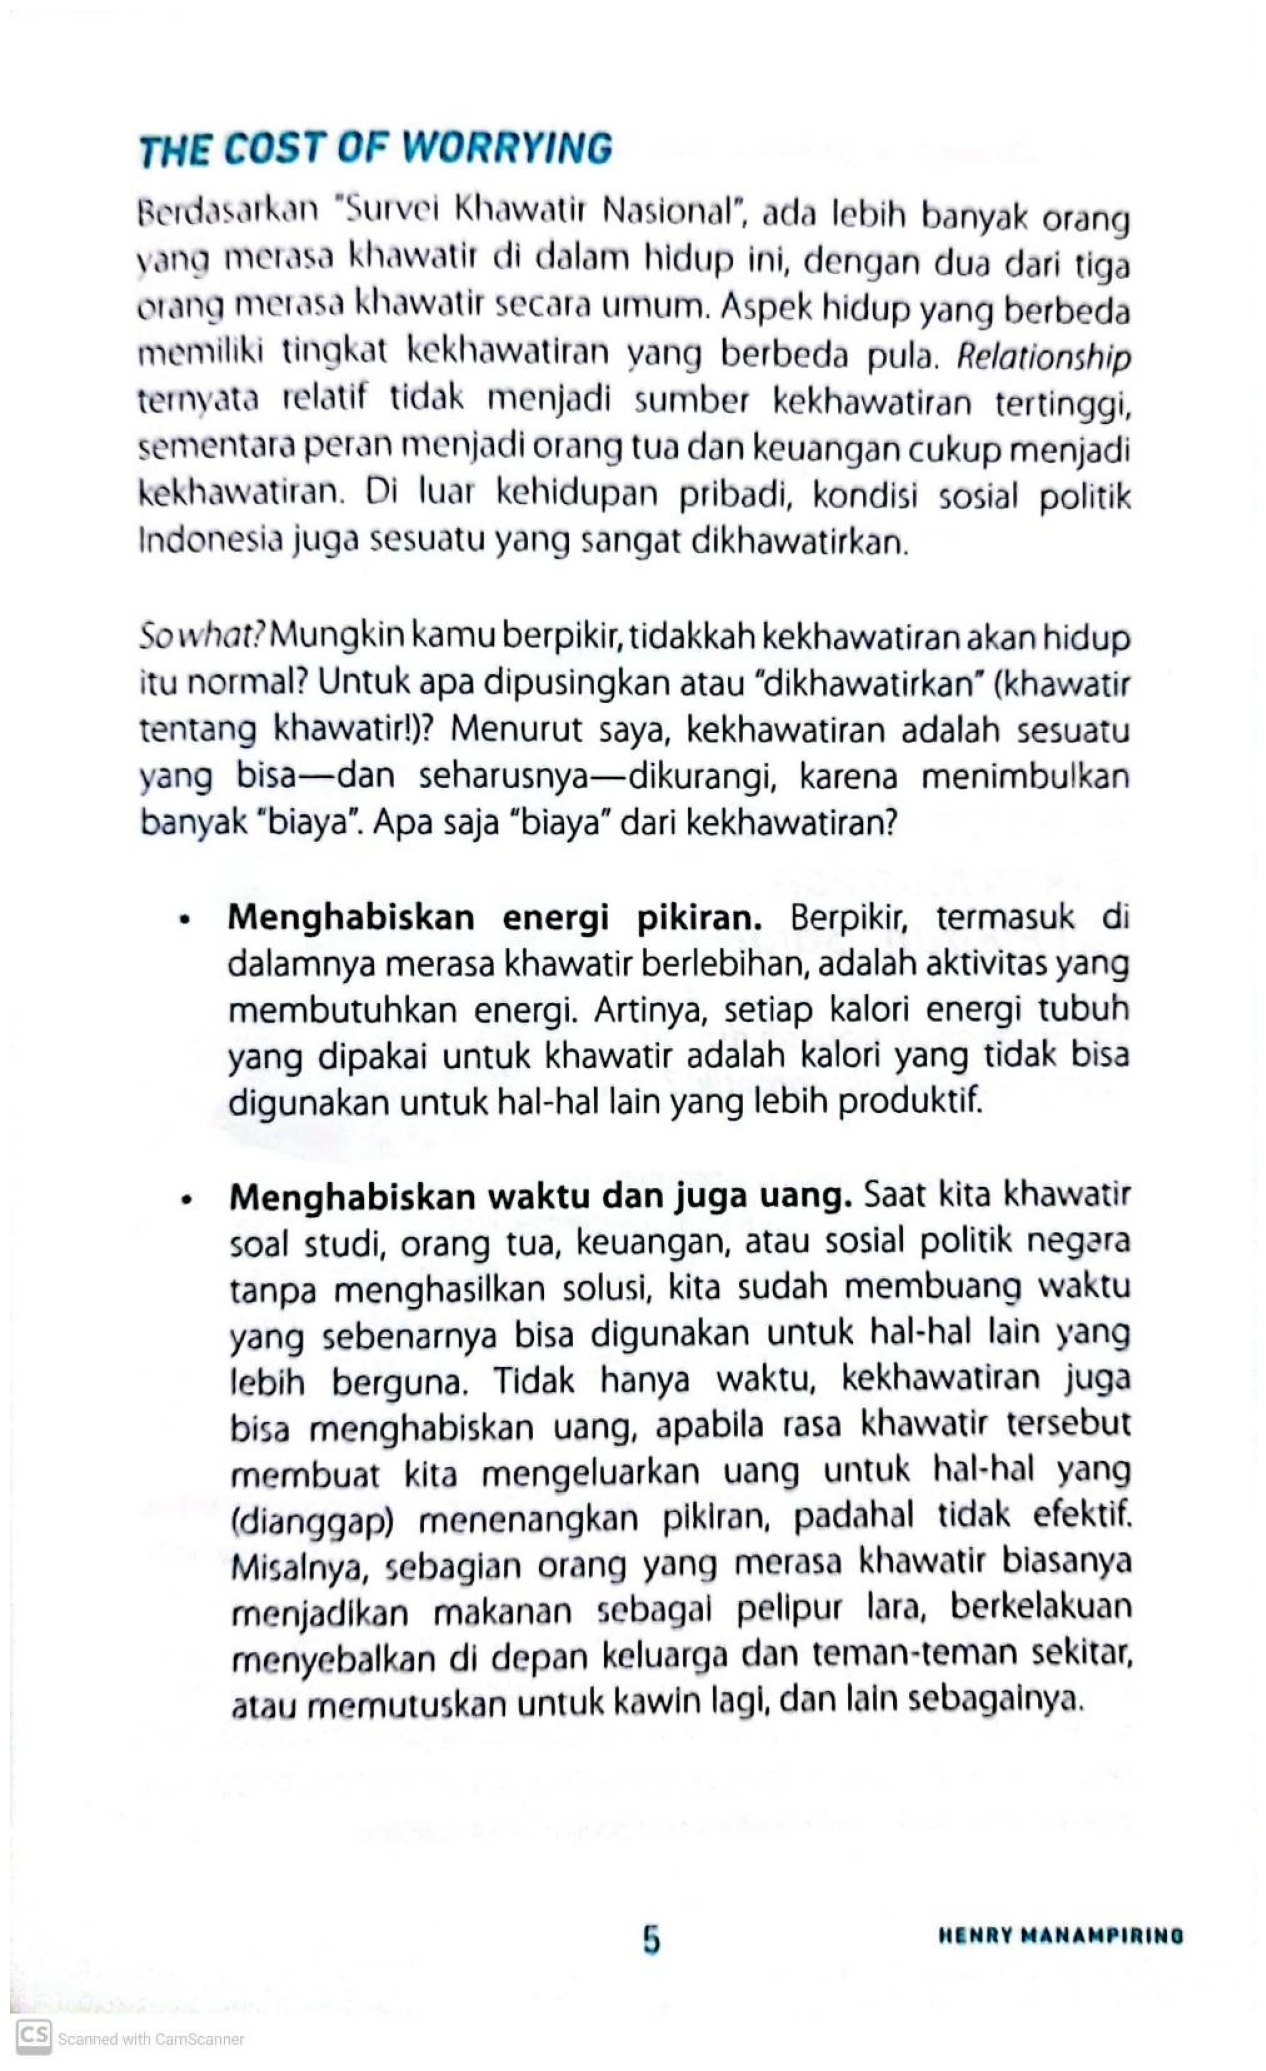

In [16]:
display(img_file)

In [17]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

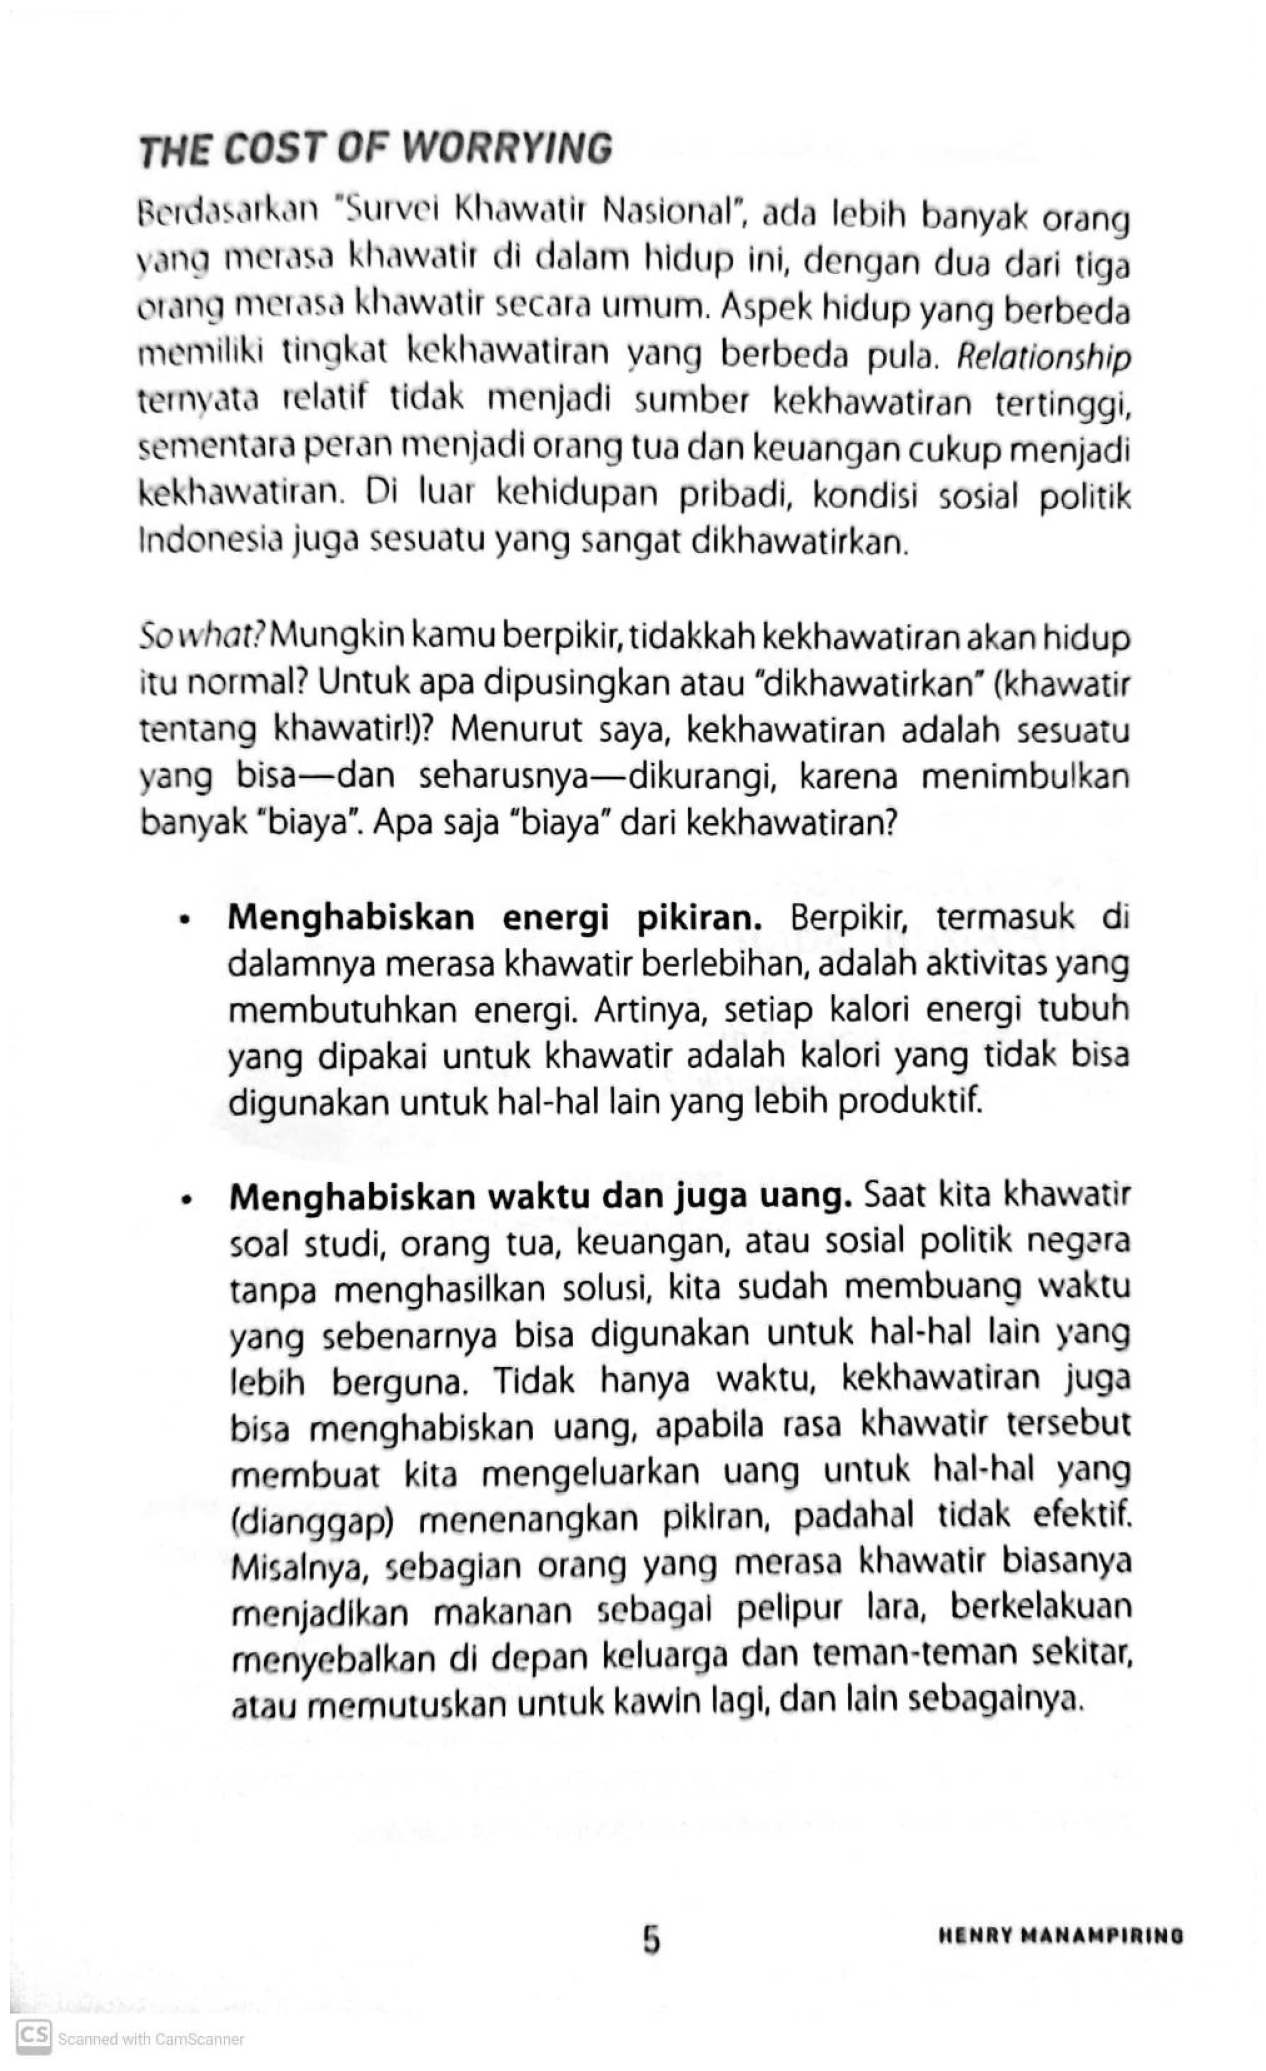

In [19]:
display("temp/gray.jpg")

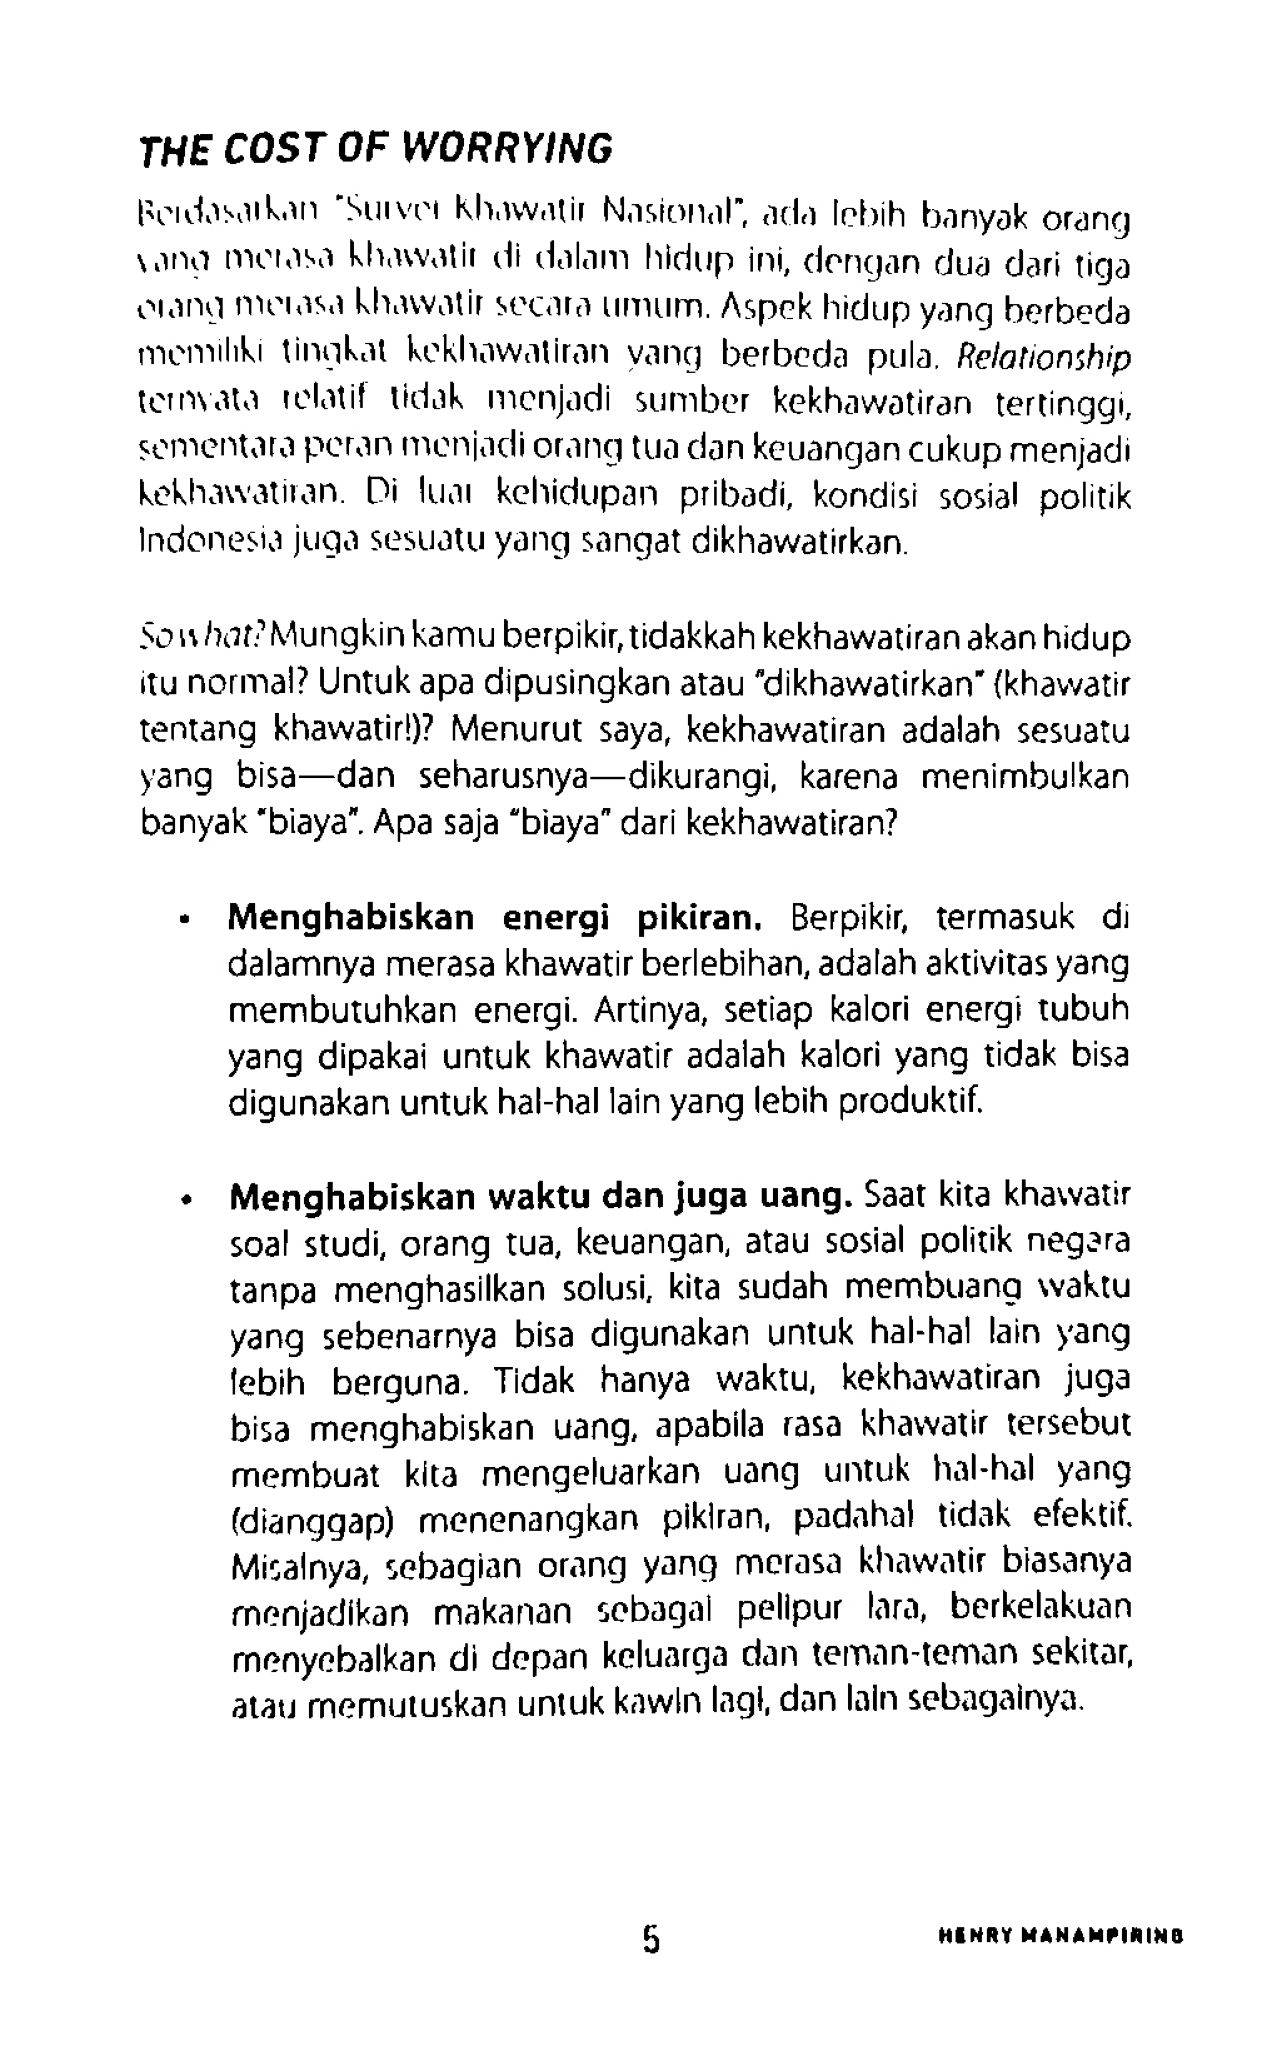

In [20]:
thresh, im_bw = cv2.threshold(gray_image, 140, 255 , cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)
display("temp/bw_image.jpg")

In [21]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return (image)

In [22]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

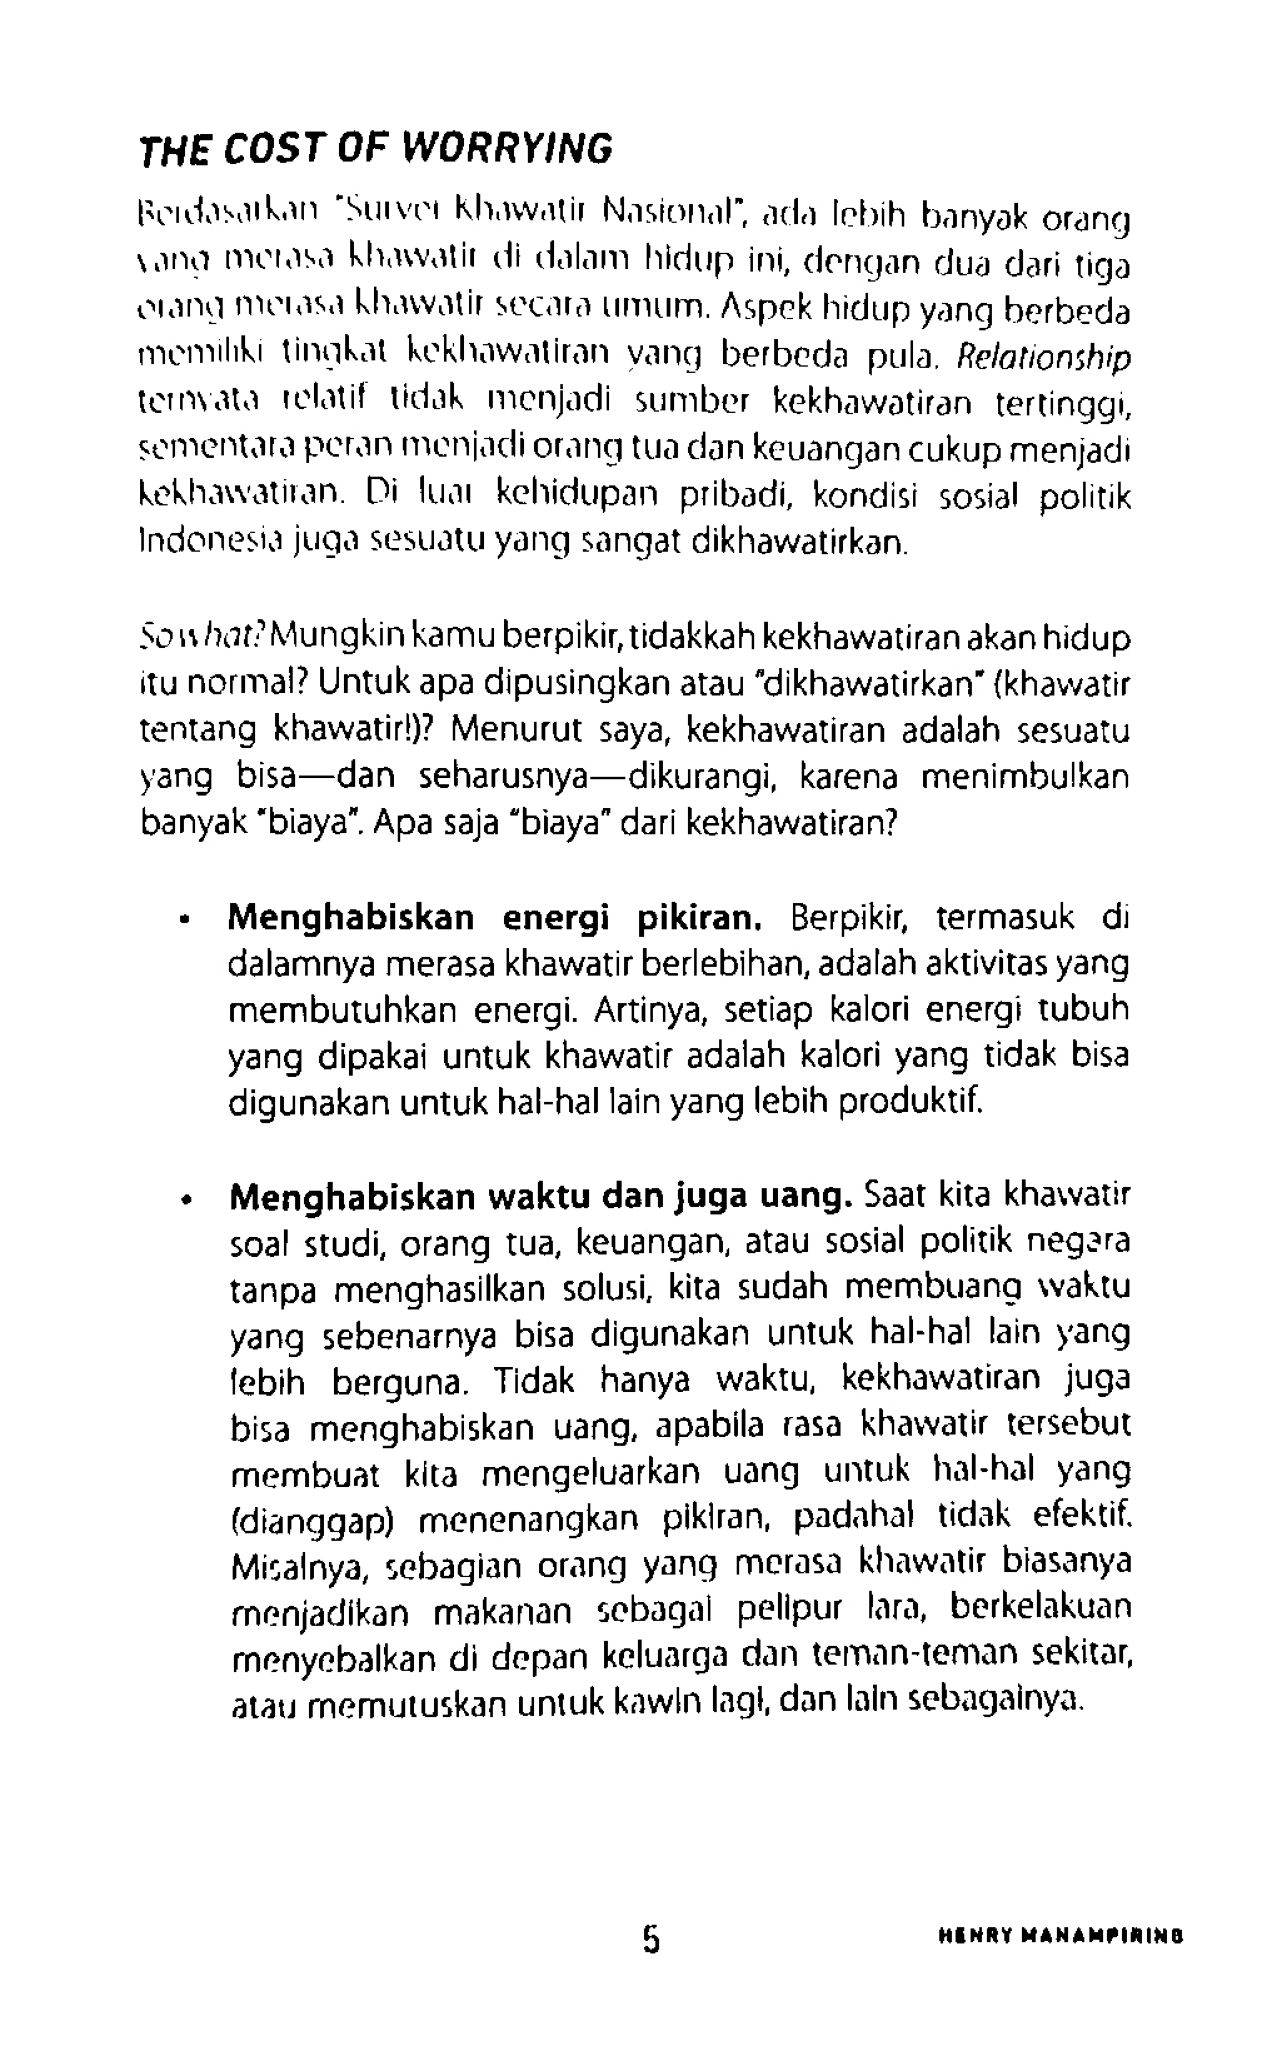

In [23]:
display("temp/no_noise.jpg")

In [25]:
# Prints Image to Test
print(pytesseract.image_to_string(Image.open('test_img3.jpg'), lang='ind'))

THE COST OF WORRYING

Berdasarkan "Survei Khawatir Nasional”, ada lebih banyak orang
yang merasa khawatir di dalam hidup ini, dengan dua dari tiga
orang merasa kKhawatir secara umum. Aspek hidup yang berbeda
memiliki tinakat kekhawatiran yang berbeda pula. Relationship
ternyata relatif tidak menjadi sumber kekhawatiran tertinggi,
sementara peran menjadi orang tua dan keuangan cukup menjadi
kekhawatiran. Di luar kehidupan pribadi, kondisi sosial politik
Indonesia juga sesuatu yang sangat dikhawatirkan.

Sowhat? Mungkin kamu berpikir, tidakkah kekhawatiran akan hidup
itunormal? Untuk apa dipusingkan atau “dikhawatirkan” (khawatir
tentang khawatir!)? Menurut saya, kekhawatiran adalah sesuatu
yang bisa—dan seharusnya—dikurangi, karena menimbulkan
banyak “biaya". Apa saja "biaya" dari kekhawatiran?

- Menghabiskan energi pikiran. Berpikir, termasuk di
dalamnya merasa khawatir berlebihan, adalah aktivitas yang
membutuhkan energi. Artinya, setiap kalori energi tubuh
yang dipakai untuk khawati